# **Sección 1: Origen de los datos** 🌐

## **1.1- Introducción**

En un proyecto determinado, la aplicación de estrategias de cómputo depende de la **información disponible del sistema (DATOS)** y de los **objetivos** específicos del estudio.

El laboratorio humedo es el primer acercamiento que tenemos a la generación de datos, mejor conocidos como: **Datos Crudos**. 


---
Datos Crudos: Registros originales tal como se recopilaron en el laboratorio sin ningún procesamiento, filtrado o interpretación.

---

Como QFB, trabajan con muestras complejas como:

> *   🩸 Sangre/plasma (biomarcadores)
> *   🔬 Tejidos (biopsias)
> *   🧫 Cultivos celulares (hepatocitos, líneas cancerosas)
> *   🦠 Aislamientos microbianos (resistencia antimicrobiana)

Como QFB, trabajan con muestras complejas (Datos Crudos):

Después de generar los datos, estos pasan a la computadora para proceder a su manejo y adaptarlas acorde a las herramientas de uso.

Las herramientas a utilizar es seleccionada basada a la pregunta del proyecto **¿Que me interesa conocer de mis datos?** 


# Beneficios:


1.   Dejar atrás los análisis unigénicos (qPCR) para adoptar enfoques multiómicos.

2.   Vincular sus muestras a mecanismos moleculares con impacto en terapias y diagnósticos


## **1.2- Herramientas Computacionales**

Son programas, plataformas o algoritmos diseñados para analizar, visualizar o interpretar datos biológicos complejos (genéticos, químicos, farmacológicos) de manera automática, rápida y precisa. 

**FUNCION:** simplificar tareas que manualmente serían imposibles o muy lentas.

**CONSEJOS:**
> Empieza con herramientas web (CIBERSORTx, STRING) antes de usar software local.

> Usa datos de ejemplo: Muchas herramientas ofrecen datasets de prueba para practicar.

> Busca tutoriales en YouTube: Hay guías visuales para cada herramienta.


**EJEMPLOS:**

> STRING (Web)
Función: Predecir interacciones entre proteínas 

> CIBERSORTx (Web)
Función: Estimar proporciones de tipos celulares en una muestra

> KEGG mapper (Web)
Función: Mapear genes o fármacos en vías bioquímicas conocidas

> hdWGCNA  (Software)
Función:  Encontrar grupos de genes que actúan juntos (módulos) en procesos biológicos.

## 1.2.1- STRING

STRING (Search Tool for Retrieval of Interacting Genes/Proteins) es una plataforma web gratuita que permite estudiar interacciones funcionales entre proteínas, genes o compuestos químicos. Combina datos experimentales, predicciones computacionales y minería de textos para construir redes biológicas.

**Enlace: https://string-db.org**

### Análisis avanzado (sin programar)
> Enriquecimiento funcional:

STRING automáticamente detecta qué vías o procesos biológicos están sobrerrepresentados en tu red (ej.: "apoptosis", "metabolismo de lípidos").

> Comparación entre especies
> Integración con fármacos:
Usa el plugin STITCH para incluir compuestos químicos en la red

# **Sección 2: BioComputo** 🧪💻



## **2.1- Google Colaboratory**

#### Iniciación de Google Drive

In [ ]:
from google.colab import drive #Montar Google Drive
drive.mount('/content/drive')

## **2.2- Preprocesamiento de Datos**

## 2.2.1- scRNA-seq

In [2]:
# Librerias

import pandas as pd
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
!pip install scanpy


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\Rocio\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import scanpy as sc

In [5]:
import anndata

In [6]:
# Cargar datos
singlecell=pd.read_csv("C:/Users/Rocio/Desktop/singlecell_segmented.csv", index_col=0, header=0) #Single Cell con 3,000 muestras celulares de 15 tipos celulares
singlecell=singlecell.transpose()
singlecell.head()

C:\Users\Rocio\AppData\Local\Temp\ipykernel_5992\1581996644.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

Unnamed: 0,ENSG00000238009,ENSG00000241860,ENSG00000229905,ENSG00000237491,ENSG00000177757,ENSG00000228794,ENSG00000225880,ENSG00000230368,ENSG00000272438,ENSG00000230699,...,ENSG00000276256,ENSG00000278198,ENSG00000273496,ENSG00000278384,ENSG00000273748,ENSG00000271254,ENSG00000276345,ENSG00000278817,ENSG00000277196,cell_types
EN-fetal-late.4471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99.64585861846996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EN-fetal-late
EN-fetal-late.124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EN-fetal-late
EN-fetal-late.6068,0.0,0.0,0.0,0.0,0.0,14.073577,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EN-fetal-late
EN-fetal-late.3900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EN-fetal-late
EN-fetal-late.3926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EN-fetal-late


In [7]:
# Separar la columna 'cell_types' de la matriz de expresión
cell_types = singlecell['cell_types']  # Guardamos los tipos celulares
singlecell = singlecell.drop(columns=['cell_types'])  # Quitamos la columna de la matriz 

In [8]:
# Separar la fila "feature_name" de la matriz de expresión
feature_name = singlecell.loc['feature_name'].values
singlecell = singlecell.drop(index="feature_name")

In [9]:
# Convertir valores de expresión a float
singlecell = singlecell.astype(float)

### 2.2.2- Visualización de Datos    

### Uso de Scanpy para el preprocesamiento 

En el análisis de transcriptómica de células individuales (single-cell RNA sequencing, scRNA-seq), trabajamos con grandes volúmenes de datos altamente dimensionales. Para poder extraer información útil, es necesario aplicar técnicas de preprocesamiento, reducción de dimensionalidad, identificación de grupos celulares y visualización.

Scanpy es una de las herramientas más eficientes y ampliamente utilizadas en Python para analizar datos de scRNA-seq. 

Pipeline:

 1️⃣ Leer y organizar los datos de expresión 

 2️⃣ Filtrar células y genes con baja expresión

 3️⃣ Normalizar y aplicar log-transform

 4️⃣ Identificar genes más variables 

 5️⃣ Escalar datos de expresión 

 6️⃣ Construir representaciones de los datos con UMAP para visualizar los grupos celulares.


En caso que posteriormente queramos usar R, Scanpy crea archivo compatibles con Seurat (R), para ellos construye un objeto AnnData que sigue el siguiente formato:

<fig>
<img    src="Edits/anndata_schema.svg"
        width=512
        height=512>
<figcaption>Fig. 2: Esquema de un objeto AnnData.
</figure>

In [10]:
# Construir el objeto AnnData
adata = anndata.AnnData(X=singlecell.values)

# Asignar nombres correctos a filas y columnas
adata.obs_names = singlecell.index  # Células
adata.var_names = singlecell.columns  # Genes
adata.obs["cell_types"] = cell_types  # Agregar tipos celulares como metadatos
adata.var["feature_name"] = feature_name

# Verificar estructura
print(adata)

AnnData object with n_obs × n_vars = 3000 × 30113
    obs: 'cell_types'
    var: 'feature_name'


In [11]:
# Filtrar células y genes con baja expresión
sc.pp.filter_cells(adata, min_genes=200)  # Células con al menos 200 genes detectados
sc.pp.filter_genes(adata, min_cells=3)  # Genes expresados en al menos 3 células
adata


AnnData object with n_obs × n_vars = 3000 × 24862
    obs: 'cell_types', 'n_genes'
    var: 'feature_name', 'n_cells'

In [12]:
# Normalizar la expresión génica (CPM-like normalization)
sc.pp.normalize_total(adata, target_sum=1e4)

# Aplicar log-transformación
sc.pp.log1p(adata)

min_mean=0.0125 → Excluye genes con una expresión promedio muy baja, porque suelen ser ruido.

max_mean=3 → Excluye genes con expresión excesivamente alta, que pueden ser housekeeping genes o artefactos.

min_disp=0.5 → Selecciona genes con alta dispersión (variabilidad relativa), lo que significa que su expresión varía entre células y no es uniforme.

In [13]:
# Identificar los genes más variables
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var["highly_variable"]]  # Filtrar solo genes variables
adata

View of AnnData object with n_obs × n_vars = 3000 × 6702
    obs: 'cell_types', 'n_genes'
    var: 'feature_name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [14]:
sc.pp.scale(adata, max_value=10)

C:\Users\Rocio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scanpy\preprocessing\_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


C:\Users\Rocio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scanpy\tools\_utils.py:40: UserWarning: You’re trying to run this on 6702 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


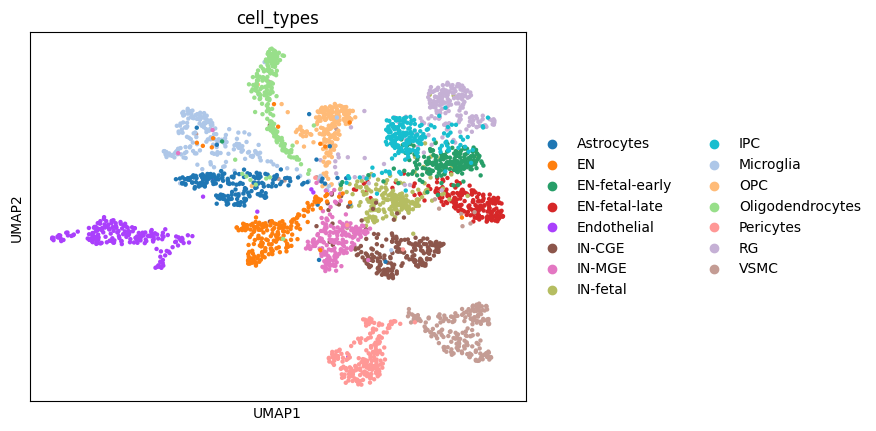

In [15]:
sc.pp.neighbors(adata, n_neighbors=30, metric="euclidean")
sc.tl.umap(adata, min_dist=0.6)
sc.pl.umap(adata, color="cell_types")

In [16]:
# Extraer la matriz de expresión desde adata.X y convertirla en DataFrame
df_expression = pd.DataFrame(
    adata.X.T,  # Transponemos para que los genes sean filas y las células columnas
    index=adata.var["feature_name"],  # Nombres de los genes como filas
    columns=adata.obs_names  # Nombres de las células como columnas
)
df_expression.head()

,EN-fetal-late.4471,EN-fetal-late.124,EN-fetal-late.6068,EN-fetal-late.3900,EN-fetal-late.3926,EN-fetal-late.3207,EN-fetal-late.2617,EN-fetal-late.5009,EN-fetal-late.3474,EN-fetal-late.1939,...,Oligodendrocytes.4083,Oligodendrocytes.3485,Oligodendrocytes.268,Oligodendrocytes.5342,Oligodendrocytes.494,Oligodendrocytes.1645,Oligodendrocytes.1205,Oligodendrocytes.2811,Oligodendrocytes.3296,Oligodendrocytes.3546
feature_name,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.7,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,...,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011,-0.070011
RP11-54O7.16,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,...,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235,-0.108235
RP11-54O7.17,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,...,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912,-0.119912
HES4,-0.397298,2.010429,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298,...,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298,-0.397298
ISG15,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,...,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108,-0.201108


In [ ]:
df_expression.to_csv("C:/Users/Rocio/Desktop/matriz_expresion_preprocesada.txt", sep="\t", index=True, header=True)

In [ ]:
# Guardar como un .h5ad para después convertirlo en .rds en R (opcional)
adata.write("C:/Users/Rocio/Desktop/matriz_expresion_preprocesada.h5ad")

## 2.3 RNA-seq

### Librerias

In [ ]:
import pandas as pd # manipulación de datos
import matplotlib.pyplot as plt # Graficación
import time # Medición de tiempo
import numpy as np # Matematicas

### Lectura de datos

In [ ]:
singlecell=pd.read_csv("/content/drive/MyDrive/Curso de Marzo/SingleCell.csv", header=None) #Single Cell con 3,500 muestras celulares de 15 tipos celulares
singlecell=singlecell.transpose()

singlecell # Mostrar los datos en forma de tabla

### Procesamiento de datos RNA-seq

In [ ]:
# Carga de datos
rnaseq=pd.read_csv("/content/drive/MyDrive/Curso de Marzo/RNA-seq.csv") # Dirección en la que se encuentra el archivo RNA-seq
print("Base de datos \n")

rnaseq = rnaseq.rename({'gene_symbol': 'Brain Samples', 'b': 'Y'}, axis=1) # Cambiamos de nombre una columna
rnaseq.head() # Mostrar los datos en forma de tabla solo los primeros 5 elementos


### Filtrado de datos

In [ ]:
ages = ["11 yrs", "40 yrs"] #Edades en las que quieres inferir la proporción celular


# Filtara el DF
filtered_df = rnaseq[rnaseq["Age"].isin(ages)]

# Eliminar columna de edad
filtered_df=filtered_df.drop("Age", axis=1)

# Mostrar los resultados
filtered_df=filtered_df.set_index(["Brain Samples"])
print("Base de datos con Indice\n")

filtered_df.head()

# Define the Google Drive path
save_path = "/content/drive/MyDrive/Curso de Marzo/"

#Exportar los datos a un archivo tipo csv
filtered_df.to_csv(save_path+"filtered_df.csv")

### Guardar datos en formato txt

In [ ]:
# Carga de datos previamente segmentados
rnaseq=pd.read_csv(save_path+"filtered_df.csv", header=None)
print("Base de datos \n")
rnaseq=rnaseq.transpose()
# Save the file
np.savetxt(save_path+"Brain_Bulk.txt", rnaseq, fmt='%s', delimiter='\t')

### Vizialización de datos segmentados finales

In [ ]:
rnaseq=pd.read_csv(save_path+"Brain_Bulk.txt", header=None, delimiter="\t", index_col=0)
rnaseq

Hola


# 3- CIBERSORTx 📊

<fig>
<img    src="Edits/Methodology.png"
        width=400
        height=400>
<figcaption>Fig. 1: Graphical abstract de la metodología.
</figure>

### Link a CIBERSORTx: https://cibersortx.stanford.edu/

Pasos a seguir


1.   Crear cuenta
2.   Iniciar sesíon


### 3.1- Firmas genéticas

<fig>
<img    src="Edits/Firmas.png"
        width=800
        height=600>
<figcaption>Fig. 1: Interfaz de CIBERSORTx.
</figure>

## 3.2- Inferencia Celular

<fig>
<img    src="Edits/Proporcion.png"
        width=800
        height=600>
<figcaption>Fig. 1: Interfaz de CIBERSORTx.
</figure>

# 4- hdWGCNA


hdWGCNA es una herramienta bioinformática que permite analizar redes de coexpresión génica en estudios de transcriptómica que nos permite:

- Identificar grupos de genes que trabajan juntos en diferentes condiciones, como en enfermedades o en respuesta a fármacos

- Encontrar biomarcadores y posibles dianas terapéuticas analizando qué genes están más conectados en una red

- Comprender cómo un fármaco afecta la expresión génica y predecir posibles efectos adversos

- Estudiar enfermedades complejas como el cáncer o trastornos neurológicos a nivel molecular

### 4.1- hdWGCNA 🕸️


hdWGCNA es una herramienta bioinformática que permite analizar redes de coexpresión génica en estudios de transcriptómica que nos permite:

- Identificar grupos de genes que trabajan juntos en diferentes condiciones, como en enfermedades o en respuesta a fármacos

- Encontrar biomarcadores y posibles dianas terapéuticas analizando qué genes están más conectados en una red

- Comprender cómo un fármaco afecta la expresión génica y predecir posibles efectos adversos

- Estudiar enfermedades complejas como el cáncer o trastornos neurológicos a nivel molecular

# **Sección 5: Ciencia de Datos** 🧬💻

## 5.1- Interpretación de Resultados


La interpretación de resultados en biología computacional es el proceso de traducir datos numéricos o estadísticos en conocimiento biológicamente relevante, vinculándolos con mecanismos celulares, enfermedades o aplicaciones farmacéuticas. Se realiza en varias etapas:

> Validación técnica:

Confirmar que los resultados son robustos (ej.: repetir análisis con distintos parámetros o subconjuntos de datos).


> Contextualización biológica:

Relacionar genes, proteínas o vías identificadas con funciones conocidas usando bases de datos como KEGG, GO o Reactome.

> Integración con literatura:

Comparar resultados con estudios previos

> Herramientas de apoyo:

**Anotación funcional:** DAVID, Enrichr para identificar vías enriquecidas.

**Redes biológicas:** Cytoscape para visualizar interacciones entre genes/proteínas descubiertos.

**Plataformas farmacológicas:** DrugBank para cruzar dianas identificadas con fármacos existentes.

> Traducción a aplicaciones prácticas:

Generar hipótesis experimentales




*Siempre pregúntense: ¿Qué significa esto para la enfermedad o el fármaco que estudio?*